In [1]:
import math
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("Data/final_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df

,Price_eth,addresses_active_count_onchain,RevUSD_market,Vader_Comp,Vol._futures,Vader_Neu,bids_market,supply_miner_held_by_all_addresses_within_one_hop_of_a_mining_entity_native_units_onchain,volatility_market,AdrActCnt_market,...,bidAskSpread_market,hash_rate_mean_onchain,HashRate_market,TxCnt_market,VtyDayRet30d_market,supply_held_by_top_100_addresses_onchain,Vader_Neg,Date,target,test
0,1099.52,1230529,55986515.21,0.20215,8150.0,0.854741,2.696802e+07,2822587.597,186.406136,1040203.0,...,0.599972,145160753.6,1.582156e+08,260173.0,0.034317,2481892.551,0.039323,2021-01-05,1.612101,False
1,1207.77,1344921,34231235.25,0.20215,19470.0,0.854741,3.261763e+07,2822077.477,184.314315,914351.0,...,0.583837,163652569.0,1.485729e+08,231423.0,0.054134,2474776.497,0.039323,2021-01-06,1.535109,False
2,1224.35,1292297,22532356.46,0.20215,16830.0,0.854741,3.224854e+07,2821826.388,217.307109,817115.0,...,0.643784,155331252.4,9.512298e+07,232056.0,0.051059,2486440.508,0.039323,2021-01-07,0.661790,False
3,1215.73,1237271,38861905.57,0.20215,15380.0,0.854741,3.492305e+07,2822390.243,265.300557,695892.0,...,0.682708,136839436.2,1.109758e+08,190234.0,0.030858,2501364.372,0.039323,2021-01-08,-2.878639,False
4,1091.47,1211948,57409115.37,0.20215,22210.0,0.854741,3.533249e+07,2821437.198,434.242095,1053426.0,...,0.975458,157757649.3,1.593504e+08,289324.0,0.030561,2506447.879,0.039323,2021-01-11,-0.828492,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1645.82,968985,24045257.30,0.20215,10310.0,0.854741,3.612133e+07,2535681.337,40.577728,968985.0,...,7.179025,398153805.9,3.981538e+08,433684.0,0.021518,2861831.938,0.039323,2023-08-31,-0.188931,True
668,1629.00,1051172,16511404.94,0.20215,6920.0,0.854741,4.695970e+07,2540456.775,34.591558,981056.0,...,7.182452,417508504.3,2.576097e+08,286289.0,0.014097,2868529.984,0.039323,2023-09-01,-0.035084,True
669,1634.46,940913,38214791.46,0.20215,4760.0,0.854741,5.251132e+07,2531580.566,18.351362,772112.0,...,7.174868,342854665.7,3.603416e+08,592036.0,0.023862,2865732.583,0.039323,2023-09-05,-0.059476,True
670,1633.18,1001123,29899213.71,0.20215,5240.0,0.854741,5.297339e+07,2532717.983,25.093918,1020140.0,...,7.167681,364053703.3,4.304215e+08,387748.0,0.020988,2859586.844,0.039323,2023-09-06,0.606220,True


In [3]:
# Shift every col except for date and price_market
# df_shift = df.shift()
# df_shift["Date"] = df["Date"]
# df_shift["Price_market_lag"] = df_shift["Price_market"]
# df_shift["Price_market_lag2"] = df_shift["Price_market_lag"].shift()
# df_shift["Price_market"] = df["Price_market"]
# df_shift = df_shift.dropna()
# df = df_shift.set_index('Date')

In [4]:
train_data = df[df["test"] == False]
test_data = df[df["test"] == True]

In [5]:
train = train_data
train.rename(columns={"Date": "ds", "target": "y"}, inplace=True)
test = test_data
test.rename(columns={"Date": "ds", "target": "y"}, inplace=True)

# make prediction
predictions = list()
for i in range(test.shape[0]):
    train_lb = train.iloc[-200:]

    model = Prophet()
    # model.add_regressor('Open_market')
    # model.add_regressor('High_market')
    # model.add_regressor('Low_market')
    # model.add_regressor('Price_market_lag')
    # model.add_regressor('Price_market_lag2')
    model.fit(train_lb)

    test_out = pd.DataFrame(test.iloc[i].drop(columns=["y"])).transpose()

    out_forecast = model.predict(test_out)
    out_forecast = out_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    yhat = out_forecast["yhat"]
    predictions.append(yhat)
    new_row = pd.DataFrame(test.iloc[i]).T  # transpose into row
    train = pd.concat([train, new_row])

18:08:45 - cmdstanpy - INFO - Chain [1] start processing
18:08:45 - cmdstanpy - INFO - Chain [1] done processing
18:08:46 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing
18:08:46 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing
18:08:46 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing
18:08:46 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing
18:08:46 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing
18:08:47 - cmdstanpy - INFO - Chain [1] start processing
18:08:47 - cmdstanpy - INFO - Chain [1] done processing
18:08:47 - cmdstanpy - INFO - Chain [1] start processing
18:08:47 - cmdstanpy - INFO - Chain [1] done processing
18:08:47 - cmdstanpy - INFO - Chain [1] start processing
18:08:47 - cmdstanpy - INFO - Chain [1]

MSE: 1.0174872605429472
MAE: 0.7034525018644964
RMSE: 1.008705735357417


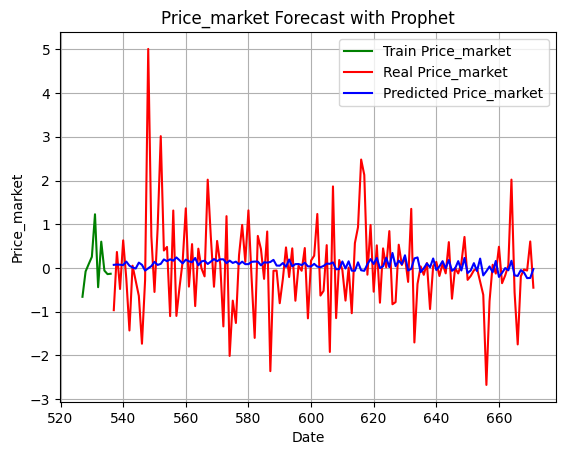

In [6]:
# report performance
mse = mean_squared_error(test["y"], predictions)
print("MSE: " + str(mse))
mae = mean_absolute_error(test["y"], predictions)
print("MAE: " + str(mae))
rmse = math.sqrt(mean_squared_error(test["y"], predictions))
print("RMSE: " + str(rmse))

# Plot the actual vs. predicted stock prices
plt.plot(
    train_data.index[-10:],
    train_data["y"].tail(10),
    color="green",
    label="Train Price_market",
)
plt.plot(test_data.index, test["y"], color="red", label="Real Price_market")
plt.plot(test_data.index, predictions, color="blue", label="Predicted Price_market")
plt.title("Price_market Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Price_market")
plt.legend()
plt.grid(True)
# plt.savefig("prophet_model.png")
plt.show()